In [ ]:
from fastai.basics import *
from fastai.vision.all import *
from sklearn import metrics

/home/tiago/anaconda3/envs/fastai/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370151529/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from my_utils import dotdict

In [ ]:
from wandb_sweep import get_dls, get_learner

In [ ]:
from model_eval import get_preds, plot_CM, plot_CM_PR, plot_top_losses_glitches

In [ ]:
import wandb

api = wandb.Api()

In [ ]:
sweep_id = "1cesj6eh"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
best_run_config = sweep.best_run().config

wandb: Sorting runs by -summary_metrics.combined_f1_time


In [ ]:
config = dotdict(best_run_config)
config.correct_labels = True
config.inference = True
config.real_gw_eval = True

In [ ]:
config.real_gw_version = '7'
# O3, shift and vmax=25.5, selected samples (N=63)

In [ ]:
dls, _, n_channels = get_dls(config)
learner = get_learner(config, dls, n_channels)
vocab = list(learner.dls.train_ds.class_dict.keys())
learner.load(f"{sweep_id}_run{config.experiment_no}")

<fastai.learner.Learner>

<matplotlib.image.AxesImage>

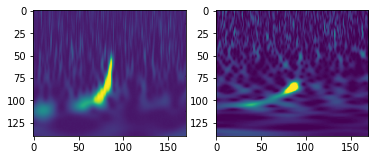

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dls.train_ds[1741][0][0])
axes[1].imshow(dls.loaders[2].dataset[0][0][0])

<matplotlib.image.AxesImage>

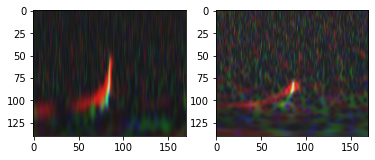

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dls.train_ds[1741][0].permute(1, 2, 0))
axes[1].imshow(dls.loaders[2].dataset[0][0].permute(1, 2, 0))

In [ ]:
preds, targets, soft_preds, y_true, y_pred = get_preds(learner, ds_idx=2)

In [ ]:
y_true, tensor([int(y) for y in y_pred])

(tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4]),
 tensor([ 4,  4,  4,  4,  4, 11,  3,  3,  4,  4,  4, 12,  4,  4,  3, 12, 11,  4,
          3,  3, 11,  4, 12,  4,  4,  4,  3, 21, 11, 11, 14, 21, 21, 14,  3, 21,
         11,  4,  4,  4,  4, 21,  3, 12,  4,  4,  4, 21,  3,  4]))

In [ ]:
cm = metrics.confusion_matrix(y_true, y_pred, labels=np.arange(22))
acc = metrics.accuracy_score(y_true, y_pred) * 100
f1 = metrics.f1_score(y_true, y_pred, average="macro") * 100
print(f"Overall accuracy: {acc:.2f}%")
print(f"Macro-averaged F1-score: {f1:.2f}%")

Overall accuracy: 46.00%
Macro-averaged F1-score: 10.50%


In [ ]:
metrics.top_k_accuracy_score(y_true, soft_preds, labels=np.arange(22), k=5)

0.78

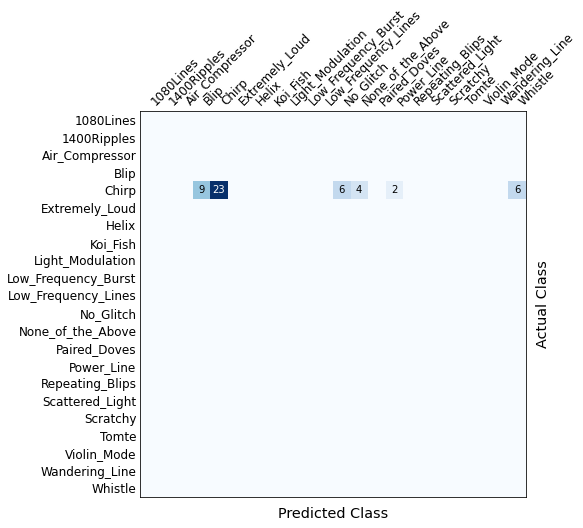

In [ ]:
fig, axes = plot_CM(cm, y_true=y_true, y_pred=y_pred, vocab=vocab, figsize=(8, 8))

In [ ]:
interp = Interpretation.from_learner(learner, ds_idx=2)

In [ ]:
from model_eval import plot_top_losses_gws

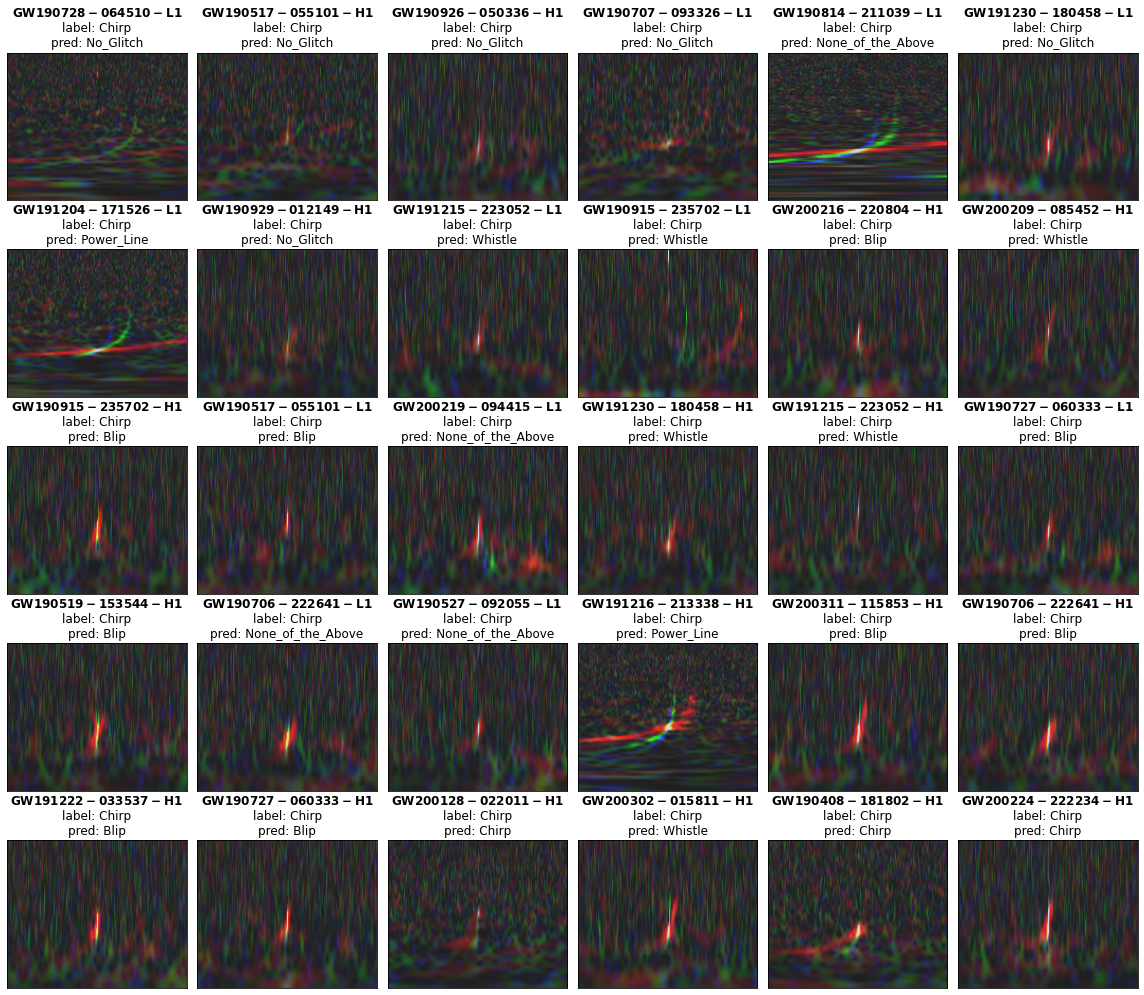

In [ ]:
fig, ax = plot_top_losses_gws(interp, learner, vocab=vocab, ds_idx=2,
    y_preds=y_pred,
    largest=True, nrows=5, ncols=6,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(16, 14)
)

#fig.savefig('../figs/glitches/18_real_gws_preds_tlbest5.png', dpi=600)

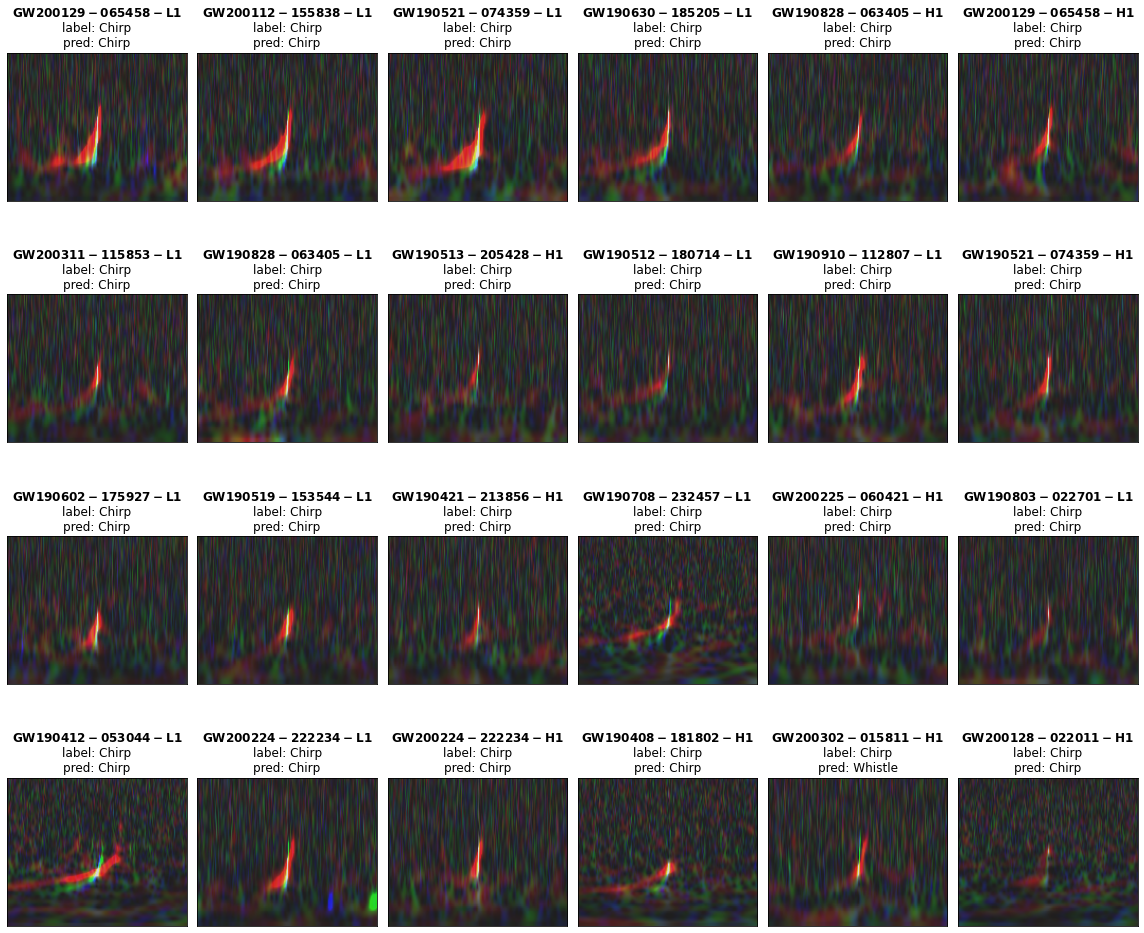

In [ ]:
fig, ax = plot_top_losses_gws(interp, learner, vocab=vocab, ds_idx=2,
    y_preds=y_pred,
    largest=False, nrows=4, ncols=6,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(16, 14)
)

#fig.savefig('../figs/glitches/18_real_gws_preds_tlbest5.png', dpi=600)

In [ ]:
config.real_gw_version = '8'

In [ ]:
dls, _, n_channels = get_dls(config)
learner = get_learner(config, dls, n_channels)
vocab = list(learner.dls.train_ds.class_dict.keys())
learner.load(f"{sweep_id}_run{config.experiment_no}")

<fastai.learner.Learner>

<matplotlib.image.AxesImage>

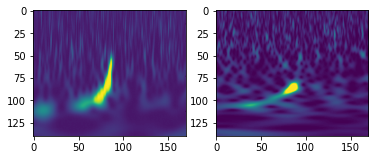

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dls.train_ds[1741][0][0])
axes[1].imshow(dls.loaders[2].dataset[0][0][0])

<matplotlib.image.AxesImage>

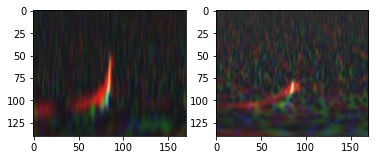

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dls.train_ds[1741][0].permute(1, 2, 0))
axes[1].imshow(dls.loaders[2].dataset[0][0].permute(1, 2, 0))

In [ ]:
preds, targets, soft_preds, y_true, y_pred = get_preds(learner, ds_idx=2)

In [ ]:
y_true, tensor([int(y) for y in y_pred])

(tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4]),
 tensor([ 4,  4,  4,  4,  4, 11,  3,  3,  4,  4,  4, 12,  4,  4,  3,  3, 11,  4,
          3,  3, 11,  4, 14,  4,  4,  4,  3,  4, 11, 11, 14,  4, 21, 14,  3,  3,
         11,  4,  4,  4,  4, 21,  3, 12,  4,  4,  4,  4,  3,  4]))

In [ ]:
cm = metrics.confusion_matrix(y_true, y_pred, labels=np.arange(22))
acc = metrics.accuracy_score(y_true, y_pred) * 100
f1 = metrics.f1_score(y_true, y_pred, average="macro") * 100
print(f"Overall accuracy: {acc:.2f}%")
print(f"Macro-averaged F1-score: {f1:.2f}%")

Overall accuracy: 52.00%
Macro-averaged F1-score: 11.40%


In [ ]:
metrics.top_k_accuracy_score(y_true, soft_preds, labels=np.arange(22), k=5)

0.78

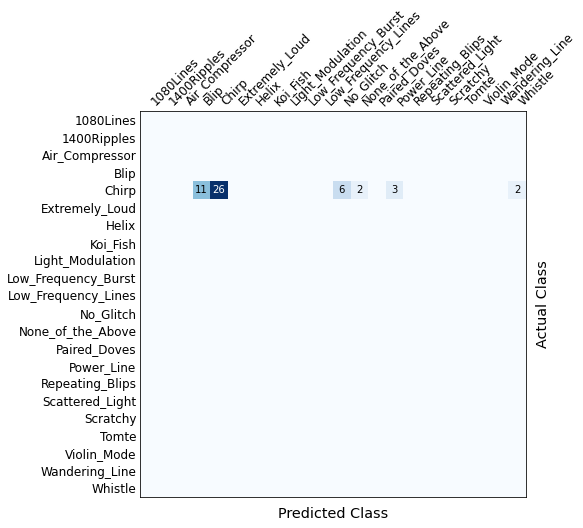

In [ ]:
fig, axes = plot_CM(cm, y_true=y_true, y_pred=y_pred, vocab=vocab, figsize=(8, 8))

In [ ]:
interp = Interpretation.from_learner(learner, ds_idx=2)

In [ ]:
from model_eval import plot_top_losses_gws

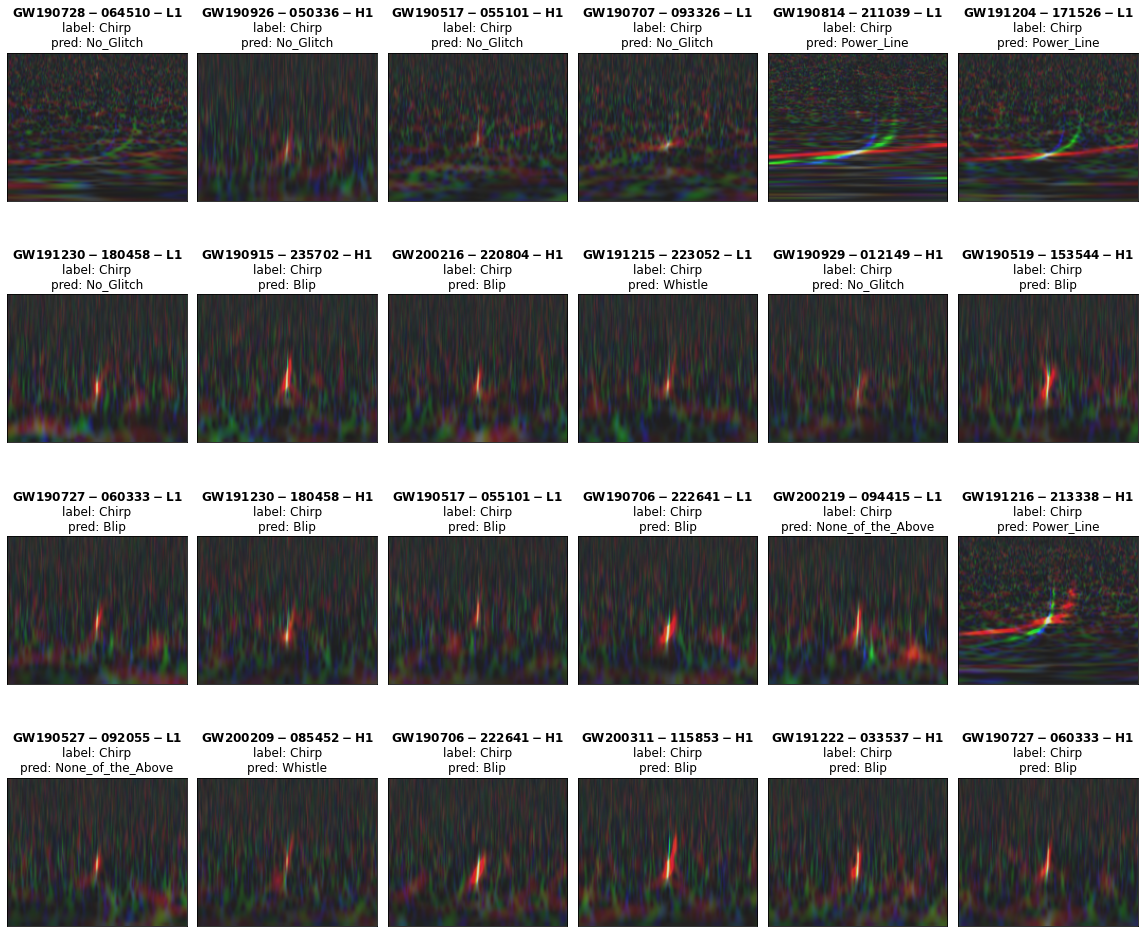

In [ ]:
fig, ax = plot_top_losses_gws(interp, learner, vocab=vocab, ds_idx=2,
    y_preds=y_pred,
    largest=True, nrows=4, ncols=6,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(16, 14)
)

#fig.savefig('../figs/glitches/18_real_gws_preds_tlbest5.png', dpi=600)

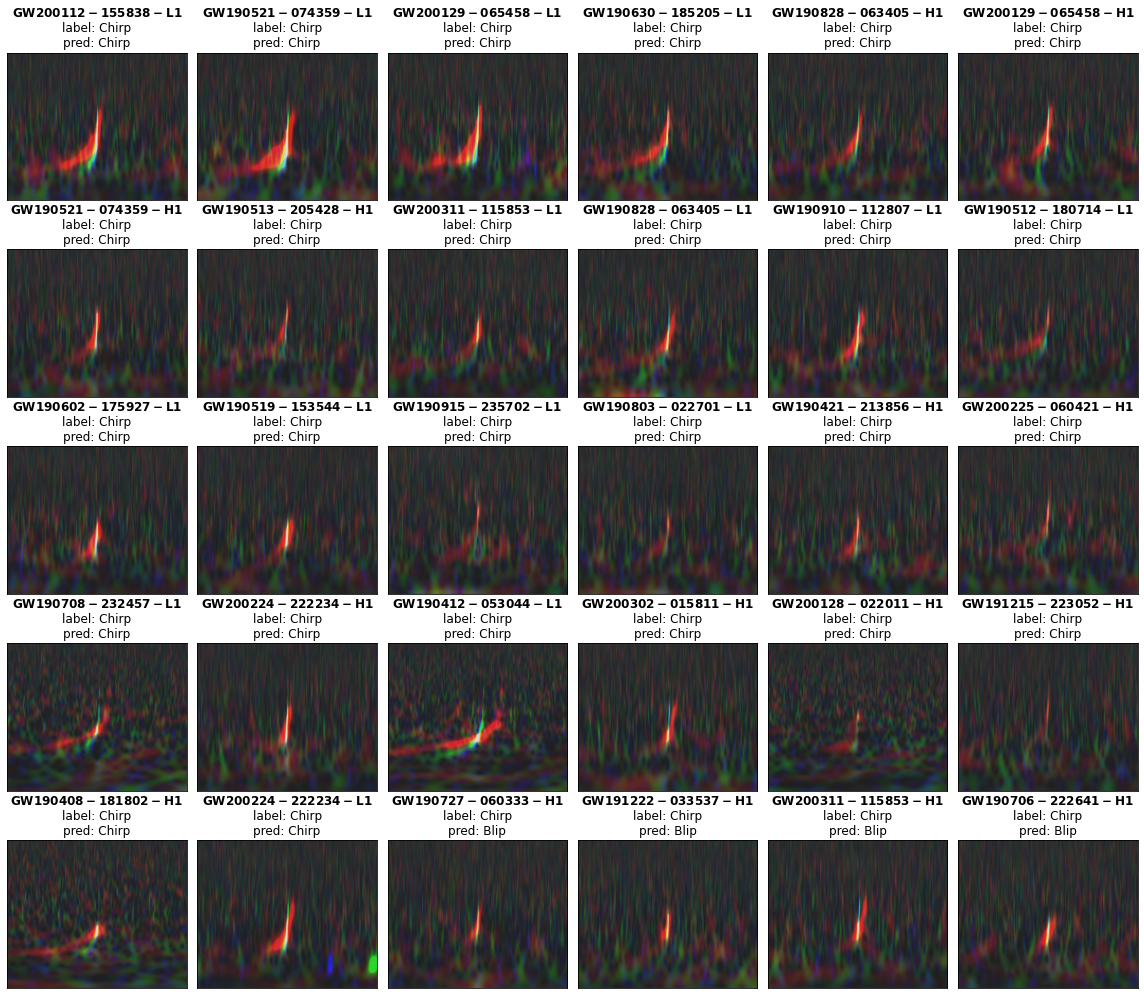

In [ ]:
fig, ax = plot_top_losses_gws(interp, learner, vocab=vocab, ds_idx=2,
    y_preds=y_pred,
    largest=False, nrows=5, ncols=6,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(16, 14)
)

#fig.savefig('../figs/glitches/18_real_gws_preds_tlbest5.png', dpi=600)

In [ ]:
config.real_gw_version = '10'
#gspy version

In [ ]:
dls, _, n_channels = get_dls(config)
learner = get_learner(config, dls, n_channels)
vocab = list(learner.dls.train_ds.class_dict.keys())
learner.load(f"{sweep_id}_run{config.experiment_no}")

<fastai.learner.Learner>

<matplotlib.image.AxesImage>

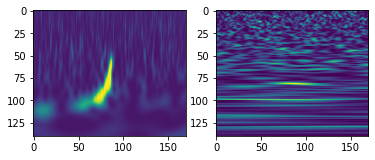

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dls.train_ds[1741][0][0])
axes[1].imshow(dls.loaders[2].dataset[0][0][0])

<matplotlib.image.AxesImage>

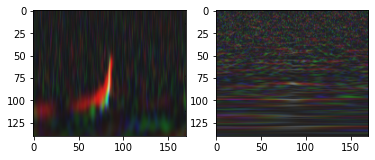

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dls.train_ds[1741][0].permute(1, 2, 0))
axes[1].imshow(dls.loaders[2].dataset[0][0].permute(1, 2, 0))

In [ ]:
preds, targets, soft_preds, y_true, y_pred = get_preds(learner, ds_idx=2)

In [ ]:
y_true, tensor([int(y) for y in y_pred])

(tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4]),
 tensor([11, 11, 21,  4, 14,  4, 11, 10, 11, 21, 12, 21, 11, 11,  2,  4, 12, 11,
          4, 21, 21, 21, 11, 21, 17, 12, 21, 14, 14, 21,  4, 11, 12, 21,  4,  4,
          4, 11, 12, 12, 12, 11, 14,  4, 11, 11, 11, 16, 11, 11,  4, 21, 11, 11,
         11, 11, 21, 21, 11, 21, 11,  4,  4, 21, 11, 11,  4,  4, 21, 11, 21, 11,
         11, 11, 11, 11, 11, 11, 11, 21, 11, 11, 11, 11, 11, 11, 12,  4, 17, 11,
         11, 11, 21,  2, 11, 11, 11, 12, 11, 14, 21, 21, 12, 11, 11, 21, 21, 14,
  

In [ ]:
cm = metrics.confusion_matrix(y_true, y_pred, labels=np.arange(22))
acc = metrics.accuracy_score(y_true, y_pred) * 100
f1 = metrics.f1_score(y_true, y_pred, average="macro") * 100
print(f"Overall accuracy: {acc:.2f}%")
print(f"Macro-averaged F1-score: {f1:.2f}%")

Overall accuracy: 15.44%
Macro-averaged F1-score: 2.67%


In [ ]:
metrics.top_k_accuracy_score(y_true, soft_preds, labels=np.arange(22), k=5)

0.3087248322147651

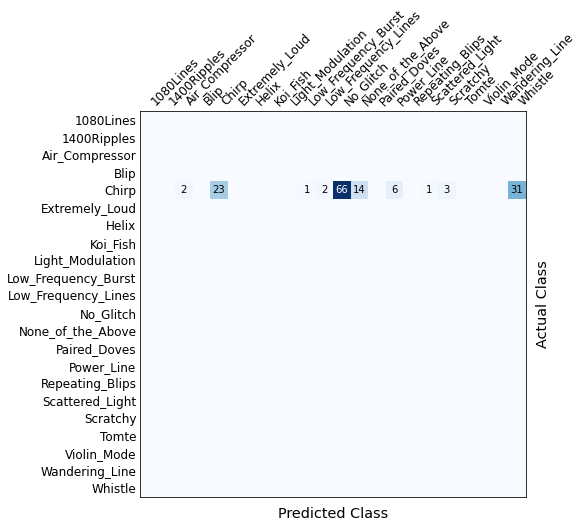

In [ ]:
fig, axes = plot_CM(cm, y_true=y_true, y_pred=y_pred, vocab=vocab, figsize=(8, 8))